# Optimización Bayesiana en Modelos de Clasificación
Este notebook aplica Scikit-Optimize y Hyperopt para optimizar un modelo Random Forest sobre datos de cáncer de mama.

In [1]:
# ✅ Instala las dependencias necesarias si no estás usando environment.yml
!pip install scikit-learn scikit-optimize hyperopt matplotlib seaborn pandas nbformat


In [2]:
import sys
from pathlib import Path

# ✅ Ir un solo nivel hacia arriba (de notebook/ a la raíz del proyecto)
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.utils import (
    cargar_datos,
    entrenar_modelo_base,
    optimizar_con_skopt,
    optimizar_con_hyperopt,
)
from src.visualizador import mostrar_resultados, mostrar_evolucion


In [3]:
print("🔍 Cargando y preparando datos...")
X_train, X_test, y_train, y_test = cargar_datos()
resultados = []

print("🌲 Entrenando modelo base (sin optimización)...")
resultado_base = entrenar_modelo_base(X_train, y_train, X_test, y_test)
resultados.append(resultado_base)

print("\n⚙️ Optimización con Scikit-Optimize...")
resultado_skopt = optimizar_con_skopt(X_train, y_train, X_test, y_test)
resultados.append(resultado_skopt)

print("\n🔧 Optimización con Hyperopt...")
resultado_hyperopt = optimizar_con_hyperopt(X_train, y_train, X_test, y_test)
resultados.append(resultado_hyperopt)


🔍 Cargando y preparando datos...
(569, 30) (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038


📊 Comparación de resultados:


/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase3MarcoParra/src/visualizador.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


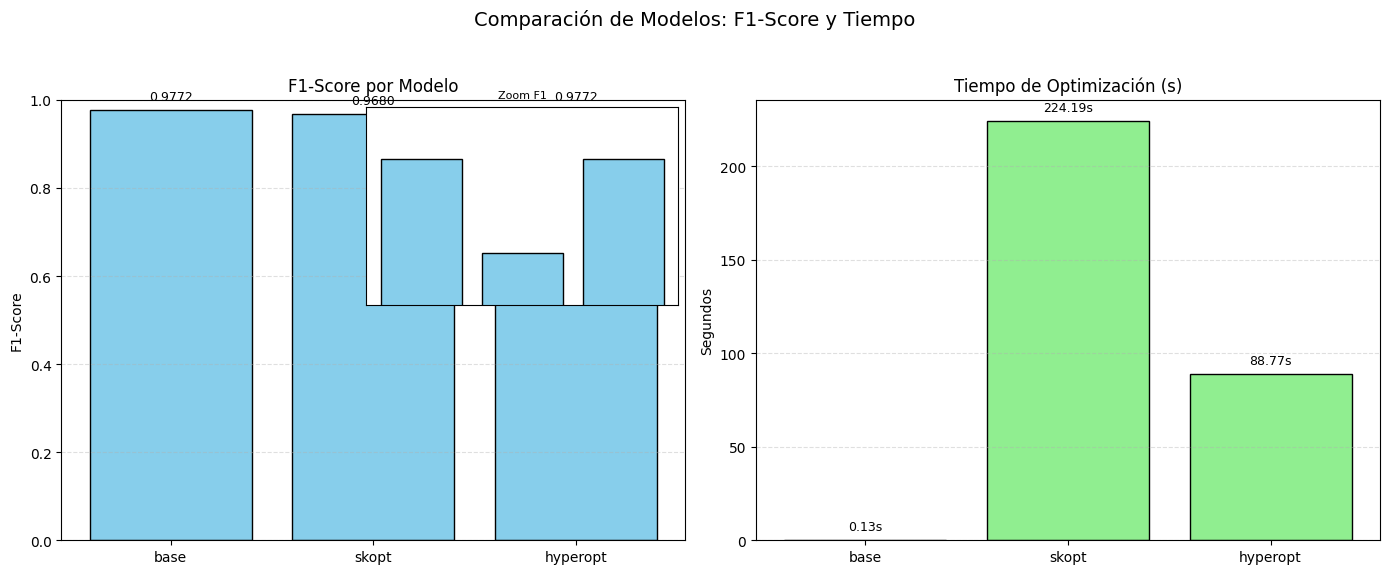

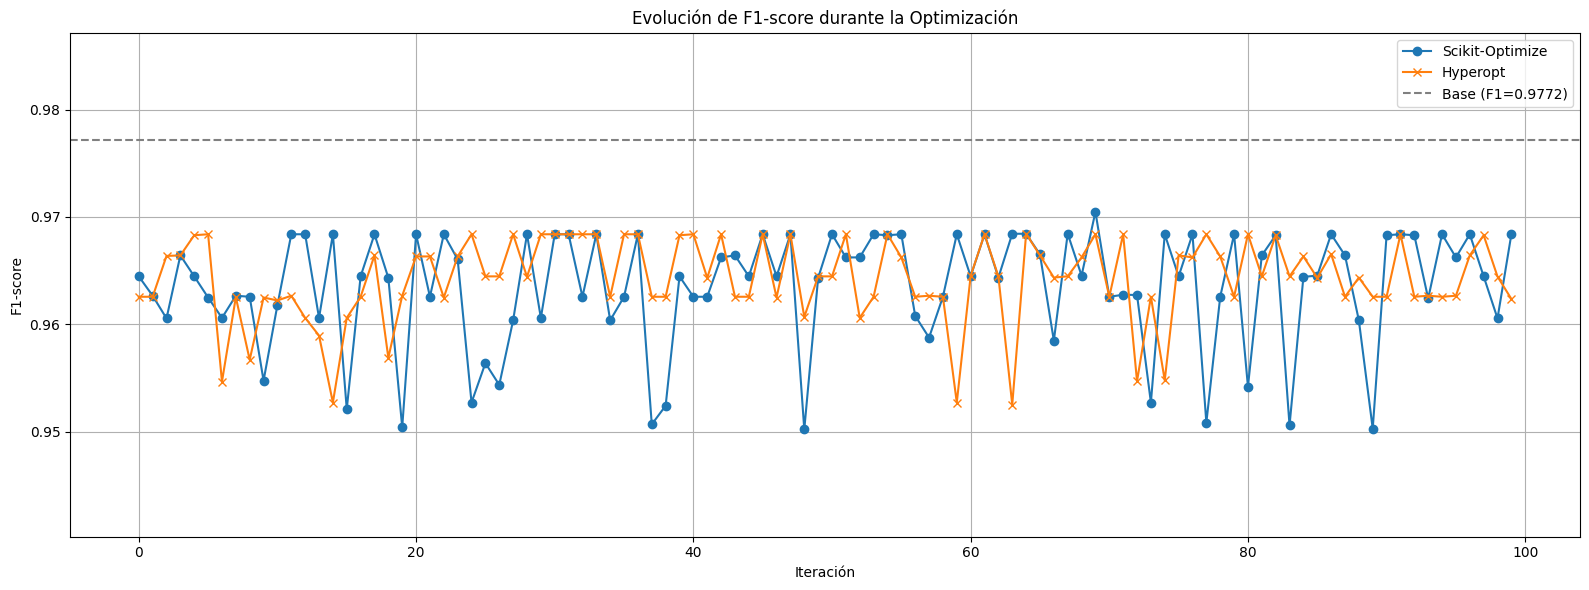

In [4]:
print("\n📊 Comparación de resultados:")
mostrar_resultados(resultados)

mostrar_evolucion(
    skopt_scores=resultado_skopt["evolucion"],
    hyperopt_scores=resultado_hyperopt["evolucion"],
    f1_base=resultado_base["f1"]
)
